In [1]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

## Regression Model ##

In [3]:
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = Table().with_columns('x', x, 'y', y)

    sample.scatter('x', 'y')
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    sample.scatter('x', 'y')
    plots.title('What We Get to See')

    sample.scatter('x', 'y', fit_line=True)
    plots.title('Regression Line: Estimate of True Line')

    sample.scatter('x', 'y', fit_line=True)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

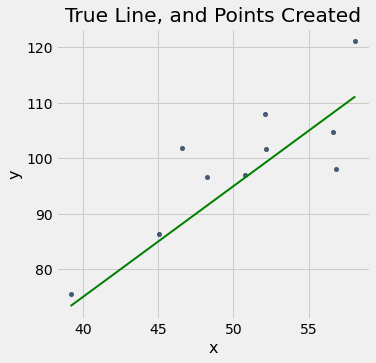

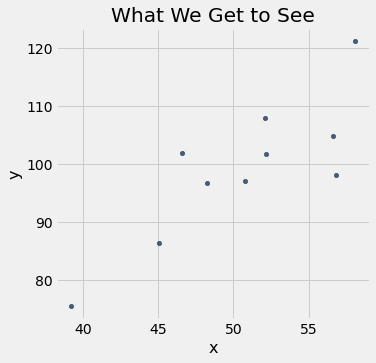

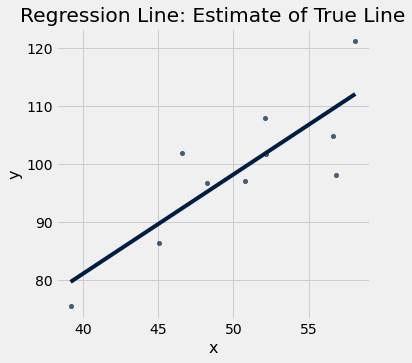

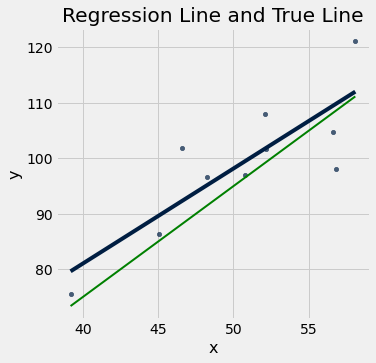

In [4]:
draw_and_compare(2, -5, 10)

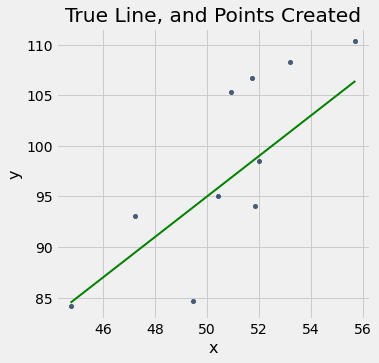

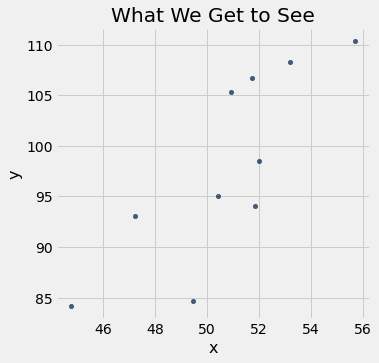

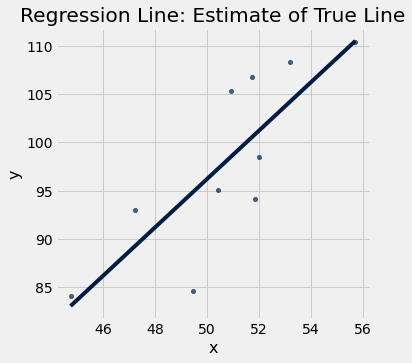

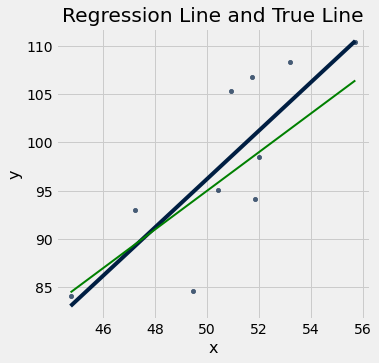

In [5]:
draw_and_compare(2, -5, 10)

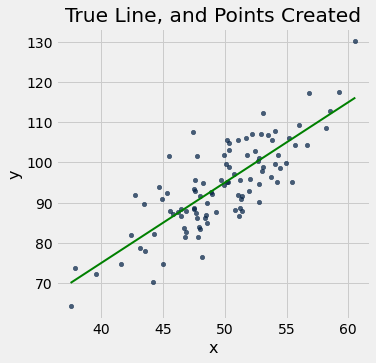

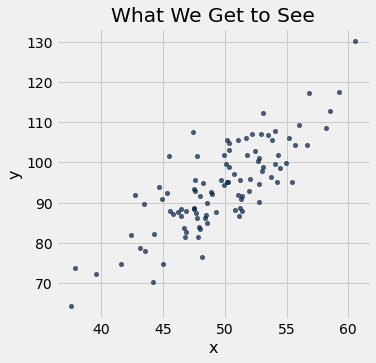

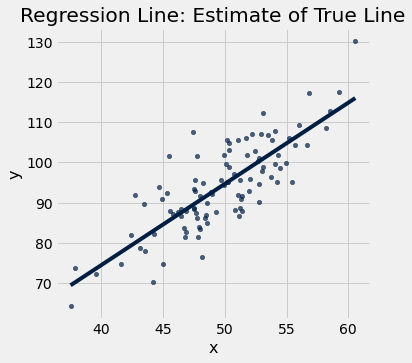

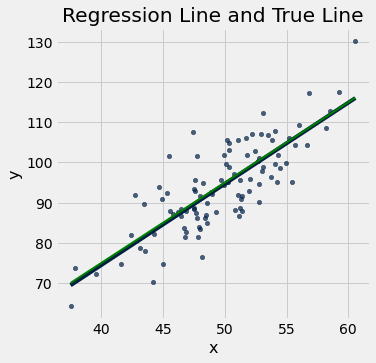

In [6]:
draw_and_compare(2, -5, 100)

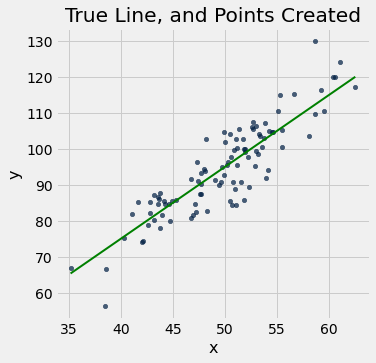

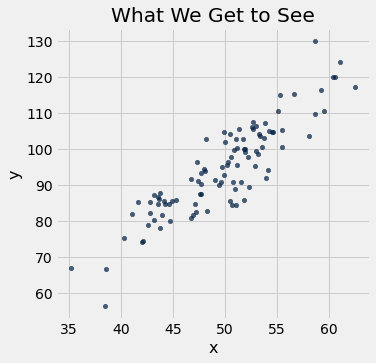

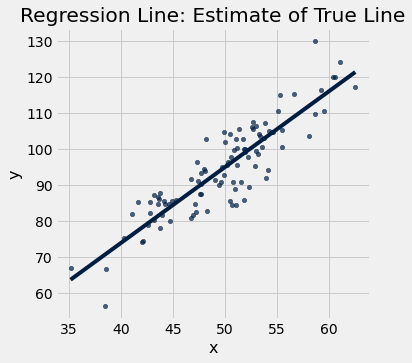

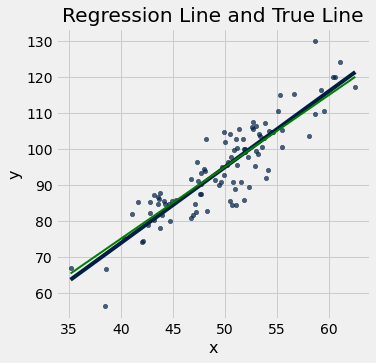

In [7]:
draw_and_compare(2, -5, 100)

## Prediction ##

In [8]:
births = Table.read_table('baby.csv')

In [9]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [10]:
# Preterm and postterm pregnancy cutoffs, according to the CDC
37 * 7, 42 * 7

(259, 294)

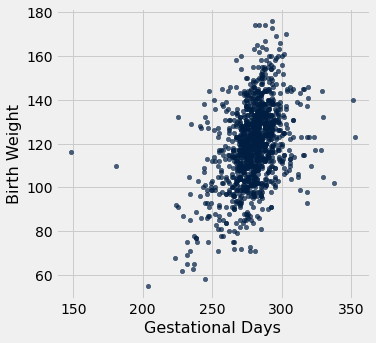

In [11]:
births.scatter('Gestational Days', 'Birth Weight')

In [12]:
births = births.where('Gestational Days', are.between(225, 325))

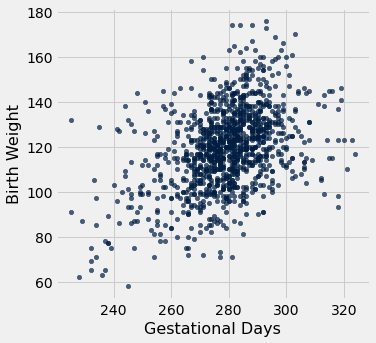

In [13]:
births.scatter('Gestational Days', 'Birth Weight')

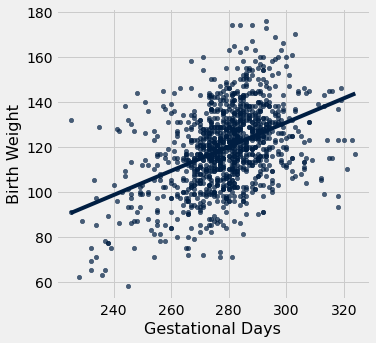

In [14]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [15]:
correlation(births, 'Gestational Days', 'Birth Weight')

0.42295118452423991

In [16]:
def prediction_at(t, x, y, x_value):
    '''
    t - table
    x - label of x column
    y - label of y column
    x_value - the x value for which we want to predict y
    '''
    return slope(t, x, y) * x_value + intercept(t, x, y)

In [58]:
prediction_at_300 = prediction_at(births, 'Gestational Days', 'Birth Weight', 300)
prediction_at_300

130.80951674248769

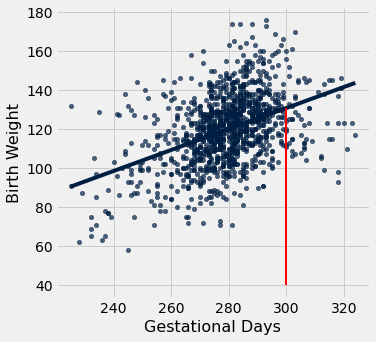

In [59]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='red', lw=2);

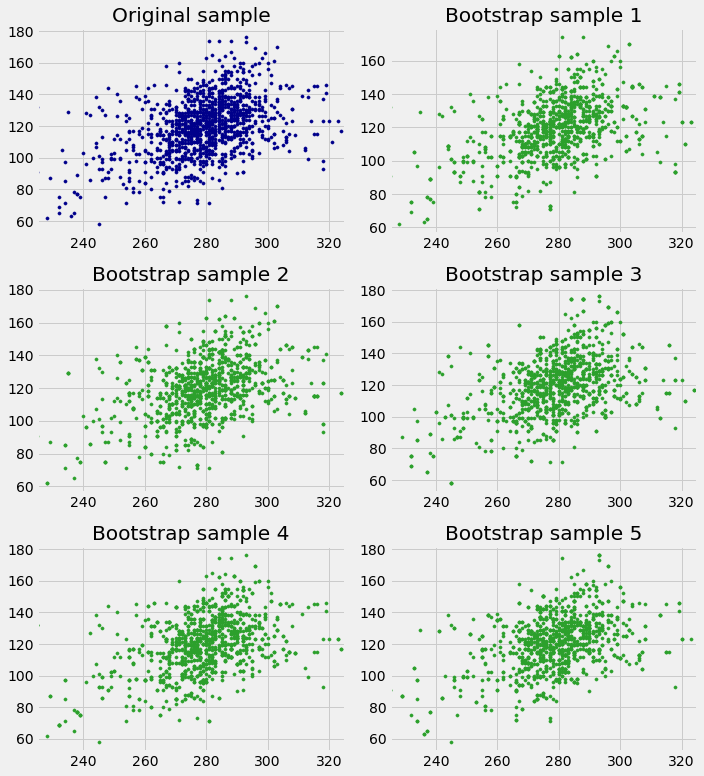

In [60]:
# You don't need to understand the plotting code in this cell,
# but you should understand the figure that comes out.

plots.figure(figsize=(10, 11))
plots.subplot(3, 2, 1)
plots.scatter(births[1], births[0], s=10, color='darkblue')
plots.xlim([225, 325])
plots.title('Original sample')

for i in np.arange(1, 6, 1):
    plots.subplot(3,2,i+1)
    resampled = births.sample()
    plots.scatter(resampled.column('Gestational Days'), resampled.column('Birth Weight'), s=10, color='tab:green')
    plots.xlim([225, 325])
    plots.title('Bootstrap sample '+str(i))
plots.tight_layout()

Predicted y from bootstramp sample was 131.704259191
Predicted y from bootstramp sample was 131.201310789
Predicted y from bootstramp sample was 130.242442939
Predicted y from bootstramp sample was 128.626449107


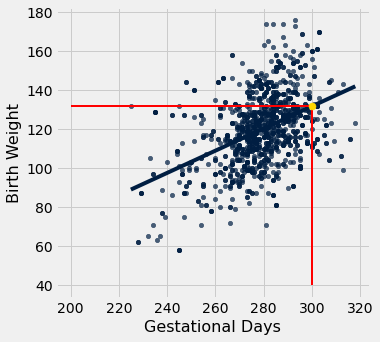

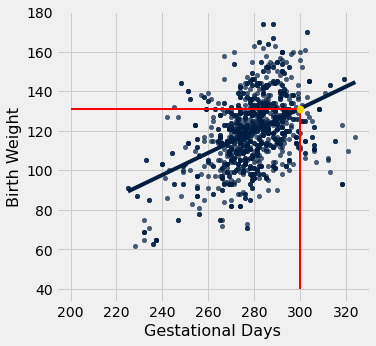

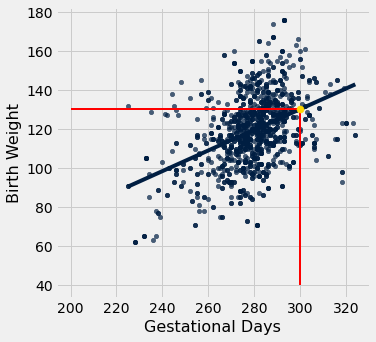

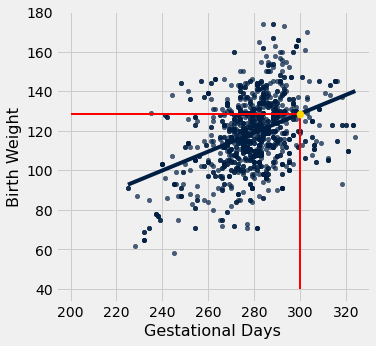

In [61]:
for i in np.arange(4):
    resample = births.sample()
    predicted_y = prediction_at(resample, 'Gestational Days', 'Birth Weight', 300)
    print('Predicted y from bootstramp sample was', predicted_y)
    resample.scatter('Gestational Days', 'Birth Weight', fit_line=True)
    plots.scatter(300, predicted_y, color='gold', s=50, zorder=3);
    plots.plot([x, x], [40, predicted_y], color='red', lw=2);
    plots.plot([200, x], [predicted_y, predicted_y], color='red', lw=2);

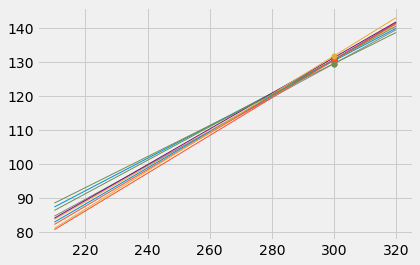

In [62]:
lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

for i in range(10): # similar to np.arange
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])

for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

In [63]:
lines = Table(['slope','intercept', 'at 291', 'at 300', 'at 309'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 291 + b, a * 300 + b, a * 309 + b])
lines


slope,intercept,at 291,at 300,at 309
0.487371,-16.7748,125.05,129.437,133.823
0.500304,-19.328,126.26,130.763,135.266
0.56125,-37.2912,126.032,131.084,136.135
0.552284,-35.3997,125.315,130.286,135.256
0.575006,-41.2542,126.072,131.248,136.423
0.56672,-38.6527,126.263,131.363,136.464
0.494549,-17.5664,126.347,130.798,135.249
0.490146,-16.5534,126.079,130.49,134.902
0.49181,-17.9883,125.128,129.555,133.981
0.592763,-46.1006,126.394,131.728,137.063


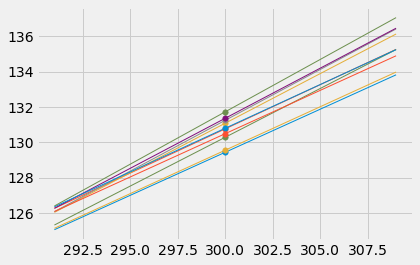

In [64]:
for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([291, 309], [line.item('at 291'), line.item('at 309')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

## Confidence Interval for Prediction ##

In [65]:
def bootstrap_prediction(t, x, y, new_x, repetitions=1000):
    """ 
    Makes a 95% confidence interval for the prediction at new_x, using
    linear regression on the data in t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """

    # Bootstrap the scatter, predict, collect
    predictions = make_array()
    for i in np.arange(repetitions):
        resample = t.sample()
        predicted_y = prediction_at(resample, x, y, new_x)
        predictions = np.append(predictions, predicted_y)

    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)

    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 95%-confidence interval for height of true line:')
    print(left, right, '(width =', right - left, ')') 

Approximate 95%-confidence interval for height of true line:
129.065703968 132.790343931 (width = 3.72463996249 )


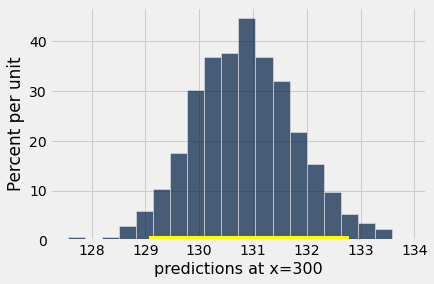

In [66]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 300)

## Predictions at Different Values of X

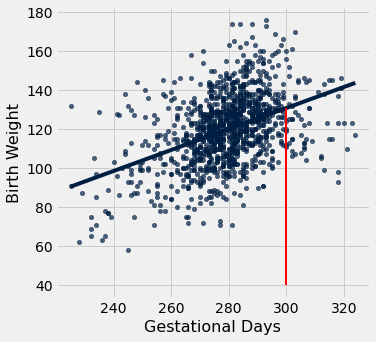

In [67]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='red', lw=2);

Approximate 95%-confidence interval for height of true line:
77.3617479748 87.8484490386 (width = 10.4867010638 )


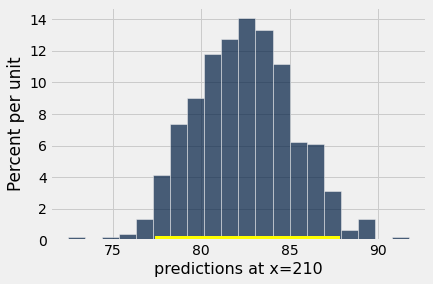

In [68]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 210)

Approximate 95%-confidence interval for height of true line:
119.085053699 120.907669757 (width = 1.82261605827 )


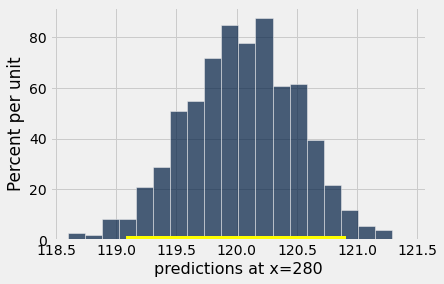

In [69]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 280)

In [70]:
np.mean(births.column('Gestational Days'))

279.11015490533561

## Inference for the Slope ##

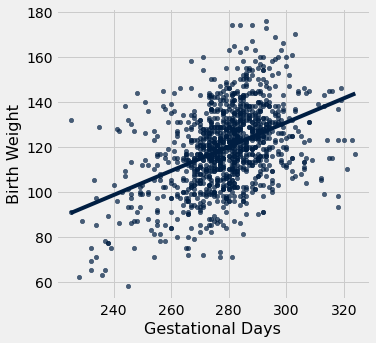

In [71]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [72]:
slope(births, 'Gestational Days', 'Birth Weight')

0.53784536766790358

In [73]:
def bootstrap_slope(t, x, y, repetitions=5000):
    """ 
    Makes a 95% confidence interval for the slope of the prediction line
    for y, using linear regression on the data in t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """
    
    # Bootstrap the scatter, find the slope, collect
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = t.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(t, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the slope of the true line:')
    print(left, 'to', right)

Slope of regression line: 0.537845367668
Approximate 95%-confidence interval for the slope of the true line:
0.459344290984 to 0.61985963768


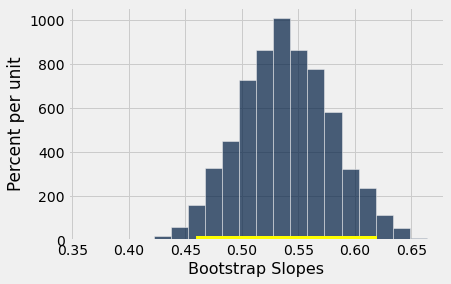

In [74]:
bootstrap_slope(births, 'Gestational Days', 'Birth Weight', 2500)

## Rain on the Regression Parade

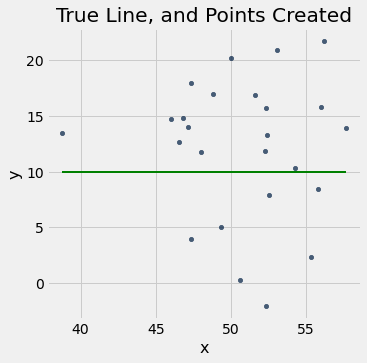

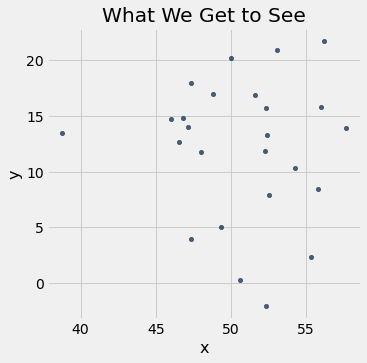

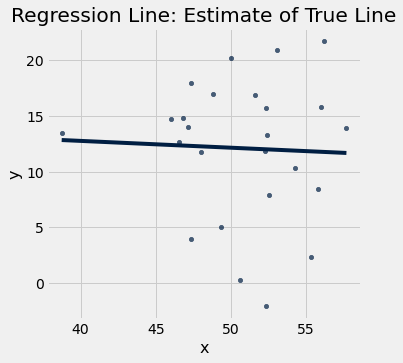

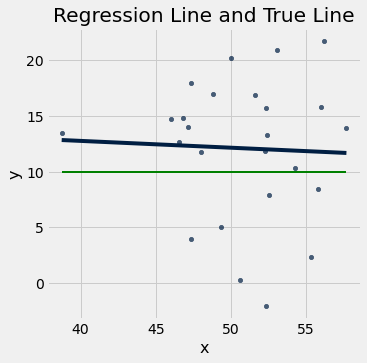

In [75]:
draw_and_compare(0, 10, 25)

**Null Hypothesis.** Slope of true line = 0.

**Alternative Hypothesis.** Slope of true line is not 0.

In [76]:
slope(births, 'Maternal Age', 'Birth Weight')

0.095142237298344659

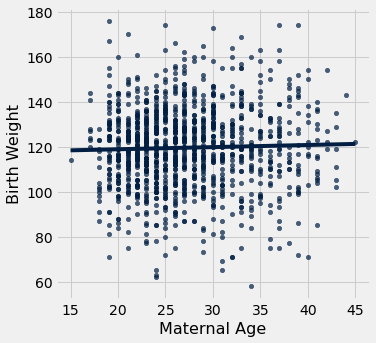

In [77]:
births.scatter('Maternal Age', 'Birth Weight', fit_line=True)

Slope of regression line: 0.0951422372983
Approximate 95%-confidence interval for the slope of the true line:
-0.090424273369 to 0.277041651161


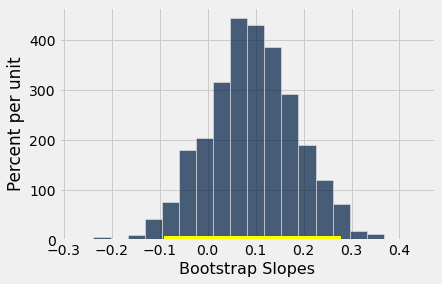

In [78]:
bootstrap_slope(births, 'Maternal Age', 'Birth Weight', 2500)

## Nonlinear regression

In [79]:
cars = Table.read_table('cars2016.csv')
cars = cars.select('name', 'city_mpg', 'highway_mpg', 'engine_torque')
cars.show(3)

name,city_mpg,highway_mpg,engine_torque
2009 Audi A3 3.2,18,25,236
2009 Audi A3 2.0 T AT,22,28,207
2009 Audi A3 2.0 T,21,30,207


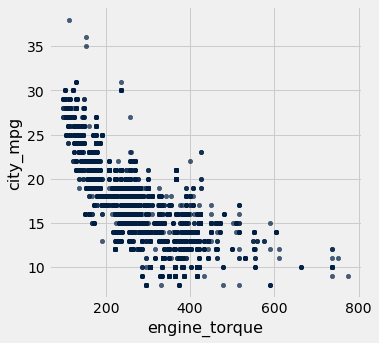

In [80]:
cars.scatter('engine_torque', 'city_mpg')

In [99]:
def compute_car_quadratic_rmse(a, b, c):
    x = cars.column('engine_torque')
    y = cars.column('city_mpg')
    quadratic_prediction = a * x**2 + b * x + c
    quadratic_mse = np.mean((y - quadratic_prediction) ** 2)
    return np.sqrt(quadratic_mse)

In [100]:
result = minimize(compute_car_quadratic_rmse)

In [101]:
a = result.item(0)
b = result.item(1)
c = result.item(2)
x = cars.column('engine_torque')
cars = cars.with_column(
    'Quadratic city mpg prediction', a * x**2 + b*x + c
)

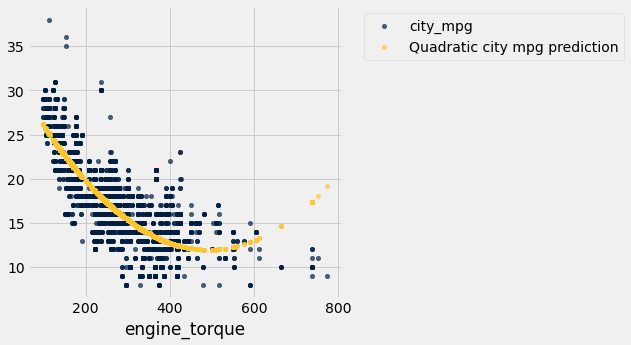

In [102]:
cars.select('engine_torque', 'city_mpg', 'Quadratic city mpg prediction').scatter('engine_torque')

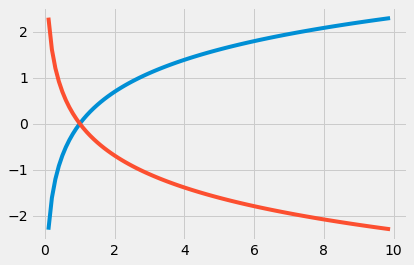

In [103]:
x_ = np.arange(.1, 10, .1)
y_ = np.log(x_)
plots.plot(x_, y_)
plots.plot(x_, -y_)

In [104]:
def compute_car_log_rmse(a, b, c):
    x = cars.column('engine_torque')
    y = cars.column('city_mpg')
    log_prediction = a * np.log(b * x) + c
    log_mse = np.mean((y - log_prediction) ** 2)
    return np.sqrt(log_mse)

In [105]:
result = minimize(compute_car_log_rmse)

<ipython-input-104-bfc95ce85714>:4: RuntimeWarning: divide by zero encountered in log
  log_prediction = a * np.log(b * x) + c
<ipython-input-104-bfc95ce85714>:4: RuntimeWarning: invalid value encountered in multiply
  log_prediction = a * np.log(b * x) + c
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:2115: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:2522: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


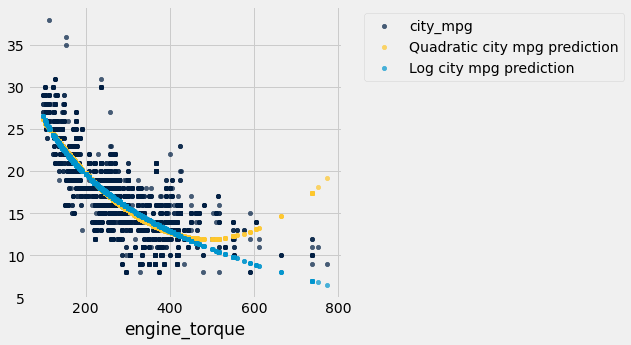

In [106]:
a = result.item(0)
b = result.item(1)
c = result.item(2)
x = cars.column('engine_torque')
cars = cars.with_column(
    'Log city mpg prediction', a * np.log(b*x) + c
)
cars.select(
    'engine_torque', 'city_mpg', 'Quadratic city mpg prediction', 'Log city mpg prediction'
).scatter('engine_torque')

## Multiple regression

In [89]:
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [90]:
correlation(births, 'Birth Weight', 'Gestational Days')

0.42295118452423991

In [91]:
correlation(births, 'Birth Weight', 'Maternal Age')

0.030444579113024124

In [92]:
correlation(births, 'Birth Weight', 'Maternal Height')

0.20732426209787841

What if we try to predict birth weight from gestational days and maternal height?

In [93]:
def multiple_regression_rmse(maternal_height_mult, gest_days_mult, intercept):
    gest_days = births.column('Gestational Days')
    maternal_height = births.column('Maternal Height')
    y = births.column('Birth Weight')
    prediction = (gest_days_mult * gest_days) + (maternal_height_mult * maternal_height) + intercept
    mse = np.mean((y - prediction) ** 2)
    return np.sqrt(mse)

In [94]:
best = minimize(multiple_regression_rmse)
best

array([   1.65828606,    0.51910473, -131.5136594 ])

In [95]:
# This means that our prediction for birth weight is:
# 1.658 * (maternal height in inches) + 0.52 * (number of gestational days) +  - 131.5 ounces

In [96]:
multiple_regression_rmse(best.item(0), best.item(1), best.item(2))

16.214886679950258

In [97]:
# Remember, RMSE for linear prediction = SD of residuals
np.std(residuals(births, 'Gestational Days', 'Birth Weight'))

16.487030777823954

In [98]:
# Remember, RMSE for linear prediction = SD of residuals
np.std(residuals(births, 'Maternal Height', 'Birth Weight'))

17.799217821893457